## Importing Requirred libraries

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Glass

### Scenario


    Prepare a model for glass classification using KNN

    Data Description:

    RI: refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    AI: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron

    Type: Type of glass: (class attribute)
        1 -- building_windows_float_processed
        2 --building_windows_non_float_processed
        3 --vehicle_windows_float_processed
        4 --vehicle_windows_non_float_processed (none in this database)
        5 --containers
        6 --tableware
        7 --headlamps






### Loading and Reading dataset

In [109]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (1).csv


In [286]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### EDA

#### Datatype Validation and Basic info checking


In [287]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

    All datatypes are valid

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [289]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [114]:
df.shape

(214, 10)

#### Repetition/Duplication checking for rows and columns

##### Row duplication checking

In [290]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [291]:
# Chcecking the row with which it duplicated with

df[(df['RI']==1.52213) & (df['Na']==14.21) & (df['Al']==0.47) & (df['Ca']==9.57) & (df['Ba']==0.0) & (df['Fe']==0.0) & (df['Type']==1)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


    So row number 38 and 39 are repeating so we have to delete one

In [292]:
# Deleting duplicated row
df = df.drop_duplicates()

In [293]:
df[37:41]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.0,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.0,1
41,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.0,0.0,1


    As we can see the index 39 is dropped now resetting the index

In [294]:
df = df.reset_index(drop=True)
df[37:41]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.0,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.0,1
40,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.0,0.0,1


    Now we can see the the index is reset is done, now we are good to go

In [295]:
df.shape

(213, 10)

##### Column duplication checking

In [296]:
df.T.duplicated()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

    Here, we can see all the values are False which shows that there are no duplicate columns

#### Null Values Checking

In [297]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

    There are no null values.

#### Outlier Detection

In [298]:
df1 = df.describe()
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
46   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
49   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
55   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31     1
102  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
103  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     2
104  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
106  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
109  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
110  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
111  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     2
130  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     2
169  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00     5
183  1.51115  17.38 

<Axes: >

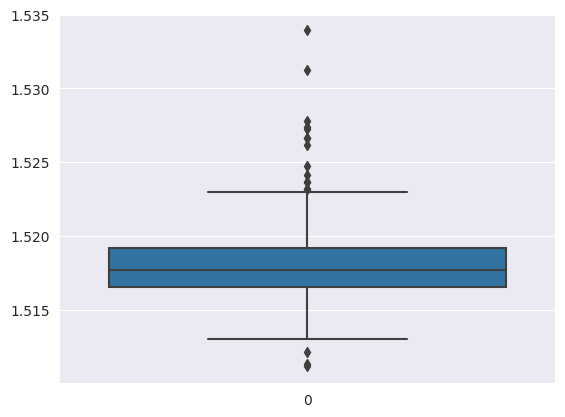

In [299]:
# For RI

q1 = df1.iloc[4,0]
q3 = df1.iloc[6,0]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['RI']<lower_limit) | (df['RI']>upper_limit)])
# print(len(df[(df['RI']<lower_limit) | (df['RI']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['RI'])

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
104  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
109  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
110  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
165  1.52151  11.03  1.71  1.56  73.44  0.58  11.62  0.00  0.00     5
183  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00     6
188  1.52365  15.79  1.83  1.31  70.43  0.31   8.61  1.68  0.00     7
11.535
15.175


<Axes: >

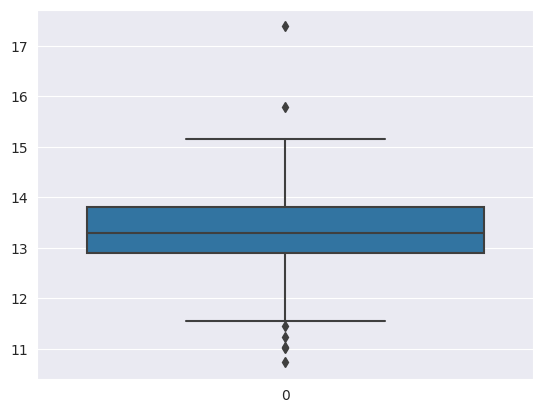

In [300]:
# For Na

q1 = df1.iloc[4,1]
q3 = df1.iloc[6,1]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Na']<lower_limit) | (df['Na']>upper_limit)])
# print(len(df[(df['Na']<lower_limit) | (df['Na']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Na'])

Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
-0.1750000000000007
5.865


<Axes: >

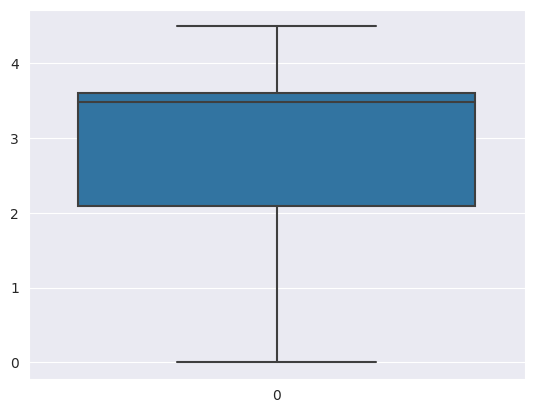

In [301]:
# For Mg

q1 = df1.iloc[4,2]
q3 = df1.iloc[6,2]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Mg']<lower_limit) | (df['Mg']>upper_limit)])
# print(len(df[(df['Mg']<lower_limit) | (df['Mg']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Mg'])

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
21   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.00  0.00     1
38   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00     1
49   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
162  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00     5
170  1.51316  13.02  0.00  3.04  70.48  6.21   6.96  0.00  0.00     5
171  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.00  0.00     5
183  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00     6
190  1.51602  14.85  0.00  2.38  73.28  0.00   8.76  0.64  0.09     7
191  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40  0.09     7
194  1.51545  14.14  0.00  2.68  73.39  0.08   9.07  0.61  0.05     7
195  1.51556  13.87  0.00  2.54  73.23  0.14   9.41  0.81  0.01     7
196  1.51727  14.70  0.00  2.34  73.28  0.00   8.95  0.66  0.00     7
197  1.51531  14.38  0.00  2.66  73.10  0.04   9.08  0.64  0.00     7
198  1.51609  15.01 

<Axes: >

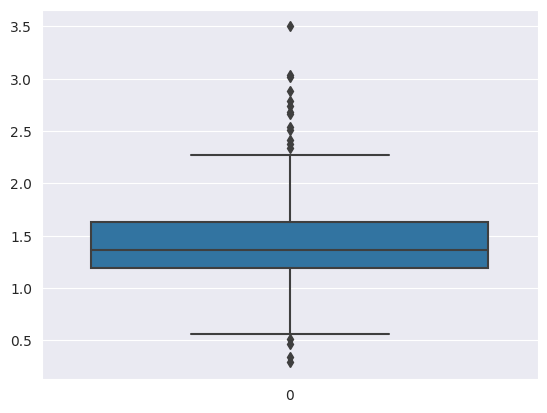

In [302]:
# For Al

q1 = df1.iloc[4,3]
q3 = df1.iloc[6,3]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Al']<lower_limit) | (df['Al']>upper_limit)])
# print(len(df[(df['Al']<lower_limit) | (df['Al']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Al'])

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
102  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
106  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
108  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.00  0.00     2
162  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00     5
170  1.51316  13.02  0.00  3.04  70.48  6.21   6.96  0.00  0.00     5
171  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.00  0.00     5
179  1.51299  14.40  1.74  1.54  74.55  0.00   7.59  0.00  0.00     6
183  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00     6
187  1.52247  14.86  2.20  2.06  70.26  0.76   9.76  0.00  0.00     7
188  1.52365  15.79  1.83  1.31  70.43  0.31   8.61  1.68  0.00     7
200  1.51653  11.95  0.00  1.19  75.18  2.70   8.93  0.00  0.00     7
71.065
74.305


<Axes: >

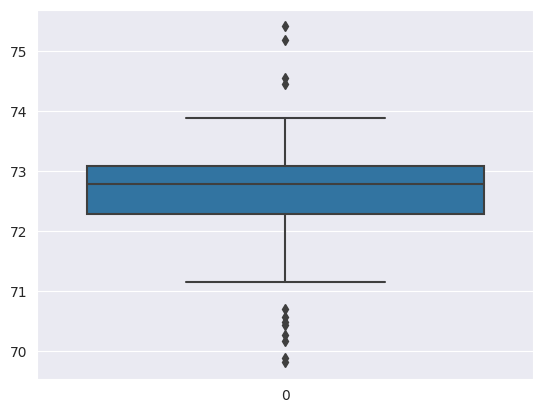

In [303]:
# For Si

q1 = df1.iloc[4,4]
q3 = df1.iloc[6,4]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Si']<lower_limit) | (df['Si']>upper_limit)])
# print(len(df[(df['Si']<lower_limit) | (df['Si']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Si'])

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
162  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.0     5
170  1.51316  13.02  0.00  3.04  70.48  6.21  6.96  0.00  0.0     5
171  1.51321  13.00  0.00  3.02  70.70  6.21  6.93  0.00  0.0     5
184  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.0     7
185  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.0     7
200  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.0     7
206  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88  0.0     7
-0.59
1.33


<Axes: >

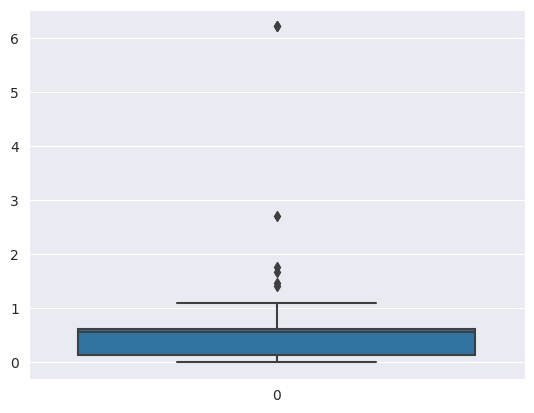

In [304]:
# For K

q1 = df1.iloc[4,5]
q3 = df1.iloc[6,5]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['K']<lower_limit) | (df['K']>upper_limit)])
# print(len(df[(df['K']<lower_limit) | (df['K']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['K'])

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
102  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
103  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     2
104  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
106  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
107  1.52222  14.43  0.00  1.00  72.67  0.10  11.52  0.00  0.08     2
108  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.00  0.00     2
109  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
110  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
111  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     2
128  1.52020  13.98  1.35  1.63  71.76  0.39  10.56  0.00  0.18     2
129  1.52177  13.75  1.01  1.36  72.19  0.33  11.14  0.00  0.00     2
130  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     2
162  1.51514  14.01 

<Axes: >

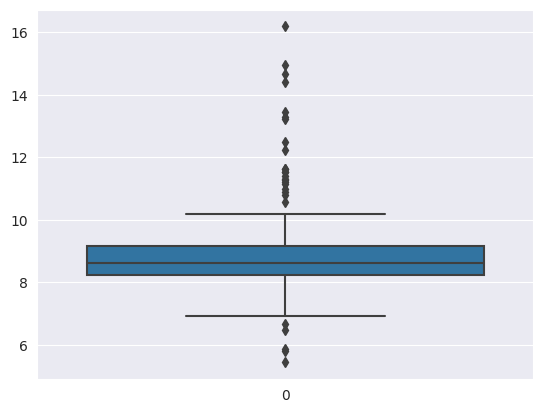

In [305]:
# For Ca

q1 = df1.iloc[4,6]
q3 = df1.iloc[6,6]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Ca']<lower_limit) | (df['Ca']>upper_limit)])
# print(len(df[(df['Ca']<lower_limit) | (df['Ca']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Ca'])

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
32   1.51775  12.85  3.48  1.23  72.97  0.61   8.56  0.09  0.22     1
36   1.51909  13.89  3.53  1.32  71.81  0.51   8.78  0.11  0.00     1
60   1.51977  13.81  3.58  1.32  71.72  0.12   8.67  0.69  0.00     1
98   1.51811  12.96  2.96  1.43  72.92  0.60   8.79  0.14  0.00     2
99   1.51655  12.75  2.85  1.44  73.27  0.57   8.79  0.11  0.22     2
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
127  1.52068  13.55  2.09  1.67  72.18  0.53   9.57  0.27  0.17     2
140  1.51851  13.20  3.63  1.07  72.83  0.57   8.41  0.09  0.17     2
141  1.51662  12.85  3.51  1.44  73.01  0.68   8.23  0.06  0.25     2
160  1.51934  13.64  3.54  0.75  72.65  0.16   8.89  0.15  0.24     3
162  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00     5
173  1.52058  12.85  1.61  2.17  72.18  0.76   9.70  0.24  0.51     5
184  1.51131  13.69  3.20  1.81  72.81  1.76   5.43  1.19  0.00     7
185  1.51838  14.32 

<Axes: >

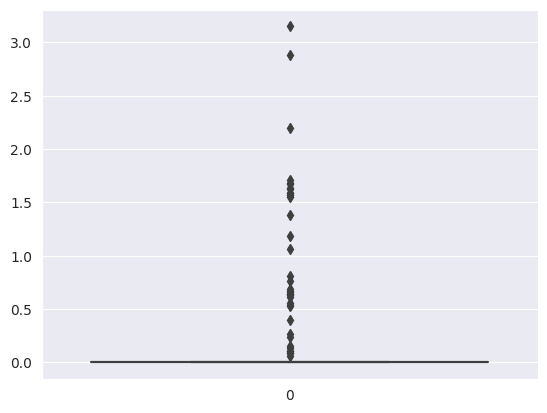

In [306]:
# For Ba

q1 = df1.iloc[4,7]
q3 = df1.iloc[6,7]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Ba']<lower_limit) | (df['Ba']>upper_limit)])
# print(len(df[(df['Ba']<lower_limit) | (df['Ba']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Ba'])

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
5    1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26     1
43   1.51786  12.73  3.43  1.19  72.95  0.62   8.76  0.00  0.30     1
55   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31     1
70   1.51848  13.64  3.87  1.27  71.96  0.54   8.32  0.00  0.32     2
104  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
117  1.51673  13.30  3.64  1.53  72.53  0.65   8.03  0.00  0.29     2
134  1.51789  13.19  3.90  1.30  72.33  0.55   8.44  0.00  0.28     2
144  1.51839  12.85  3.67  1.24  72.57  0.62   8.68  0.00  0.35     2
161  1.52211  14.19  3.78  0.91  71.36  0.23   9.14  0.00  0.37     3
173  1.52058  12.85  1.61  2.17  72.18  0.76   9.70  0.24  0.51     5
174  1.52119  12.97  0.33  1.51  73.39  0.13  11.27  0.00  0.28     5
-0.15000000000000002
0.25


<Axes: >

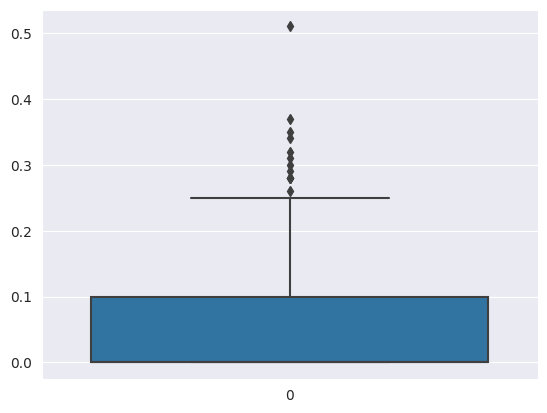

In [307]:
# For Fe

q1 = df1.iloc[4,8]
q3 = df1.iloc[6,8]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Fe']<lower_limit) | (df['Fe']>upper_limit)])
# print(len(df[(df['Fe']<lower_limit) | (df['Fe']>upper_limit)]))

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Fe'])

#### Correlation Analysis

In [308]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

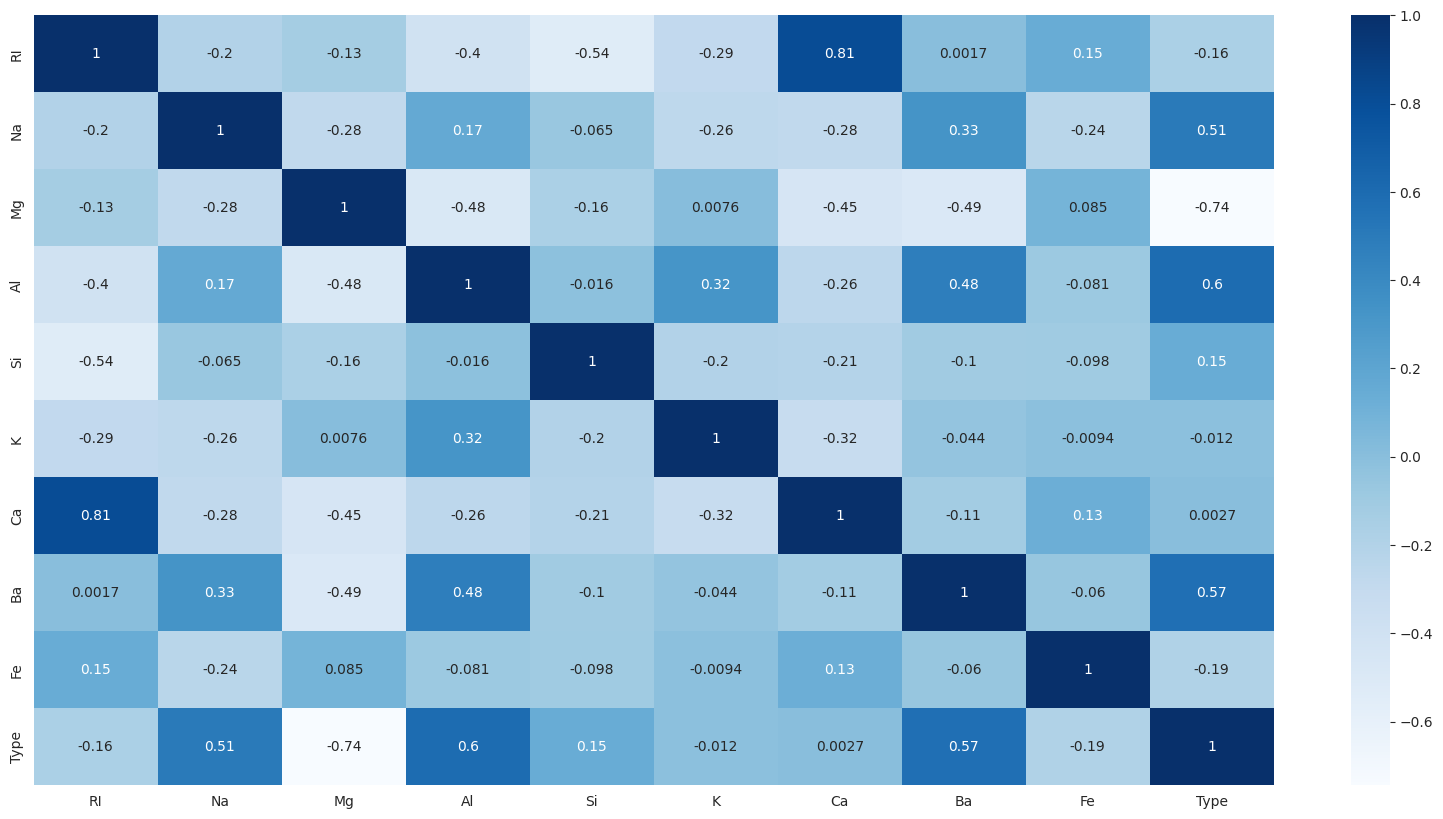

In [309]:
corr_mat = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

    Since, K(Potassium) and Ca(Calcium) showing very less correlation with the target variable so we will drop them.

In [310]:
df.drop(['K','Ca'],axis=1,inplace=True)
df

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0,1
...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,1.57,0.0,7


In [311]:
df.shape

(213, 8)

<Axes: >

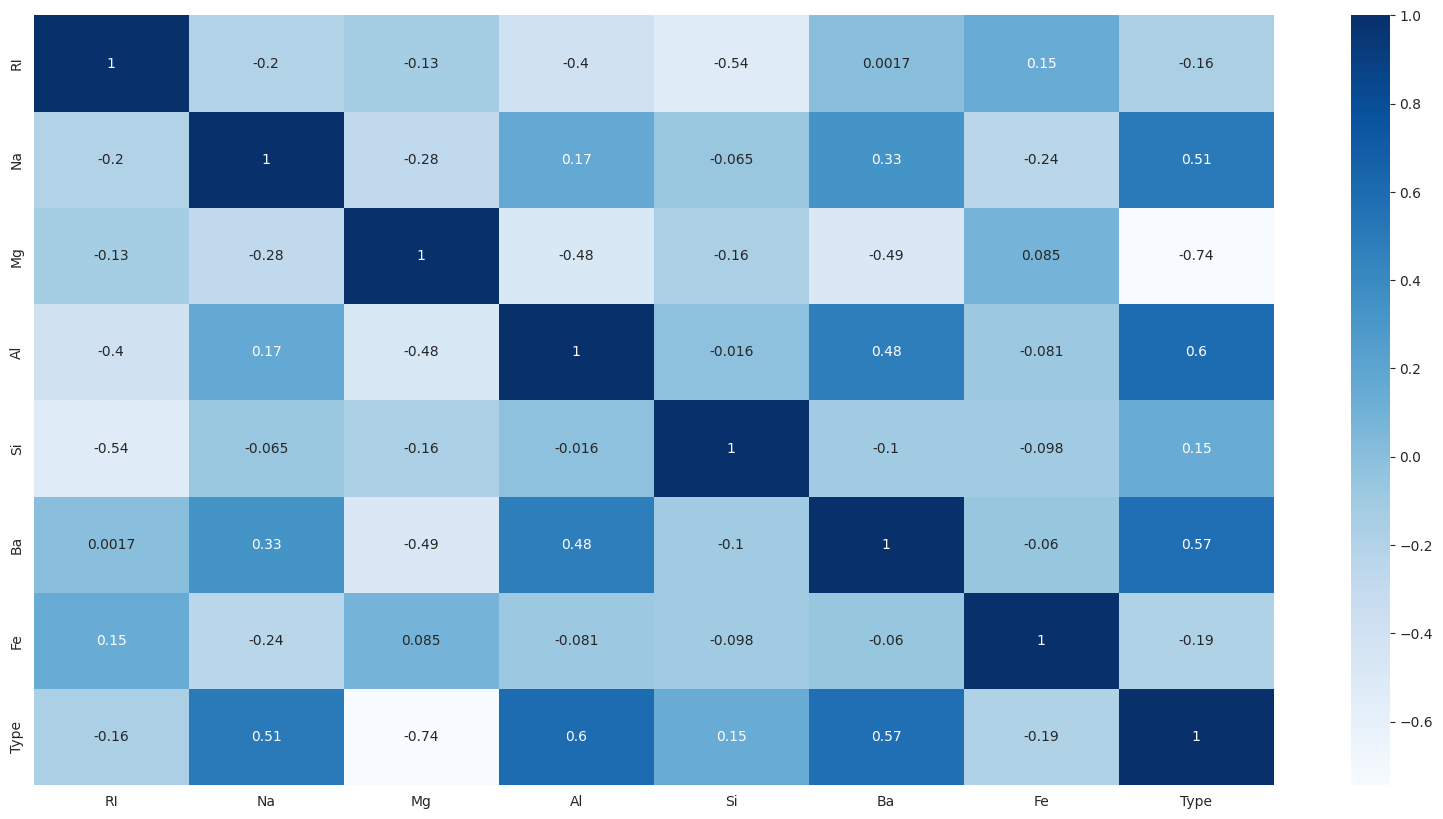

In [312]:
corr_mat = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

<Figure size 2000x2000 with 0 Axes>

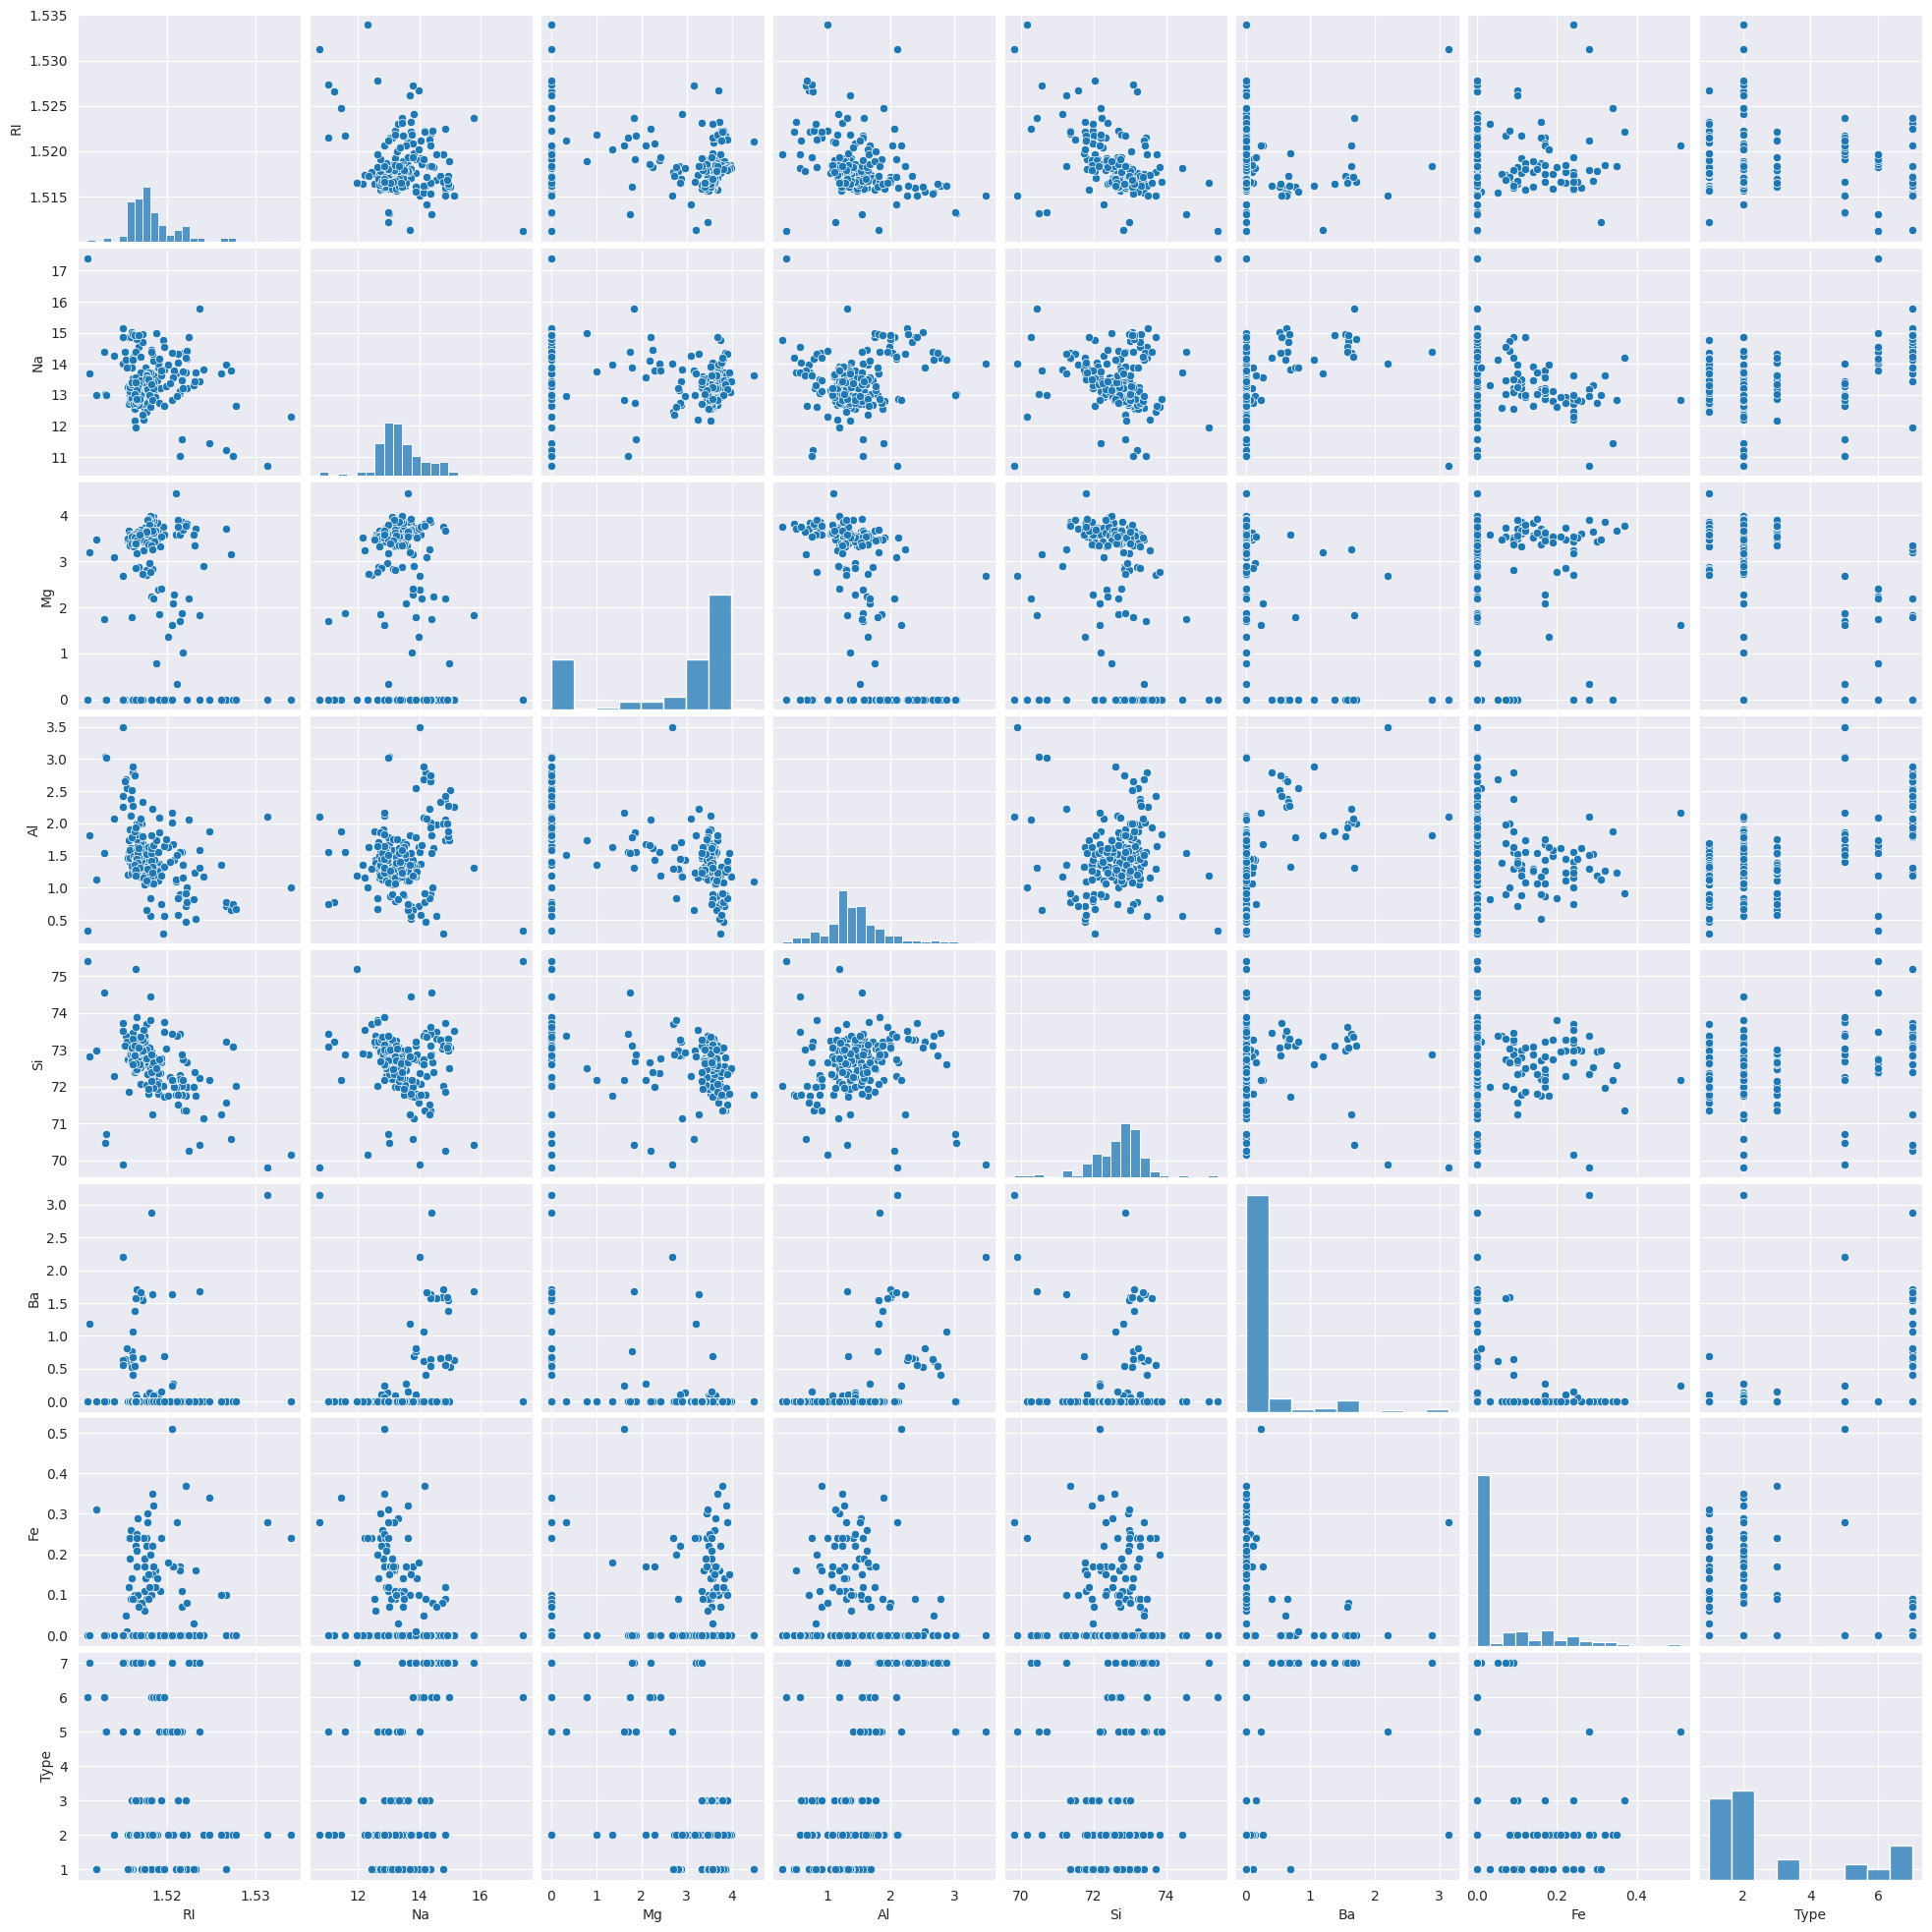

In [313]:
plt.figure(figsize=(20,20))
sns.set_style(style='darkgrid')
sns.pairplot(df)

#### Label Encoding/ Dummy variable creation for Categorical Variable

    Label encoding is not requirred as it is already encoded

In [314]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7])

#### Dependent/ Independent Variable Separation

In [315]:
df

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0,1
...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,1.57,0.0,7


In [316]:
X = df.iloc[: , 0:7]
y = df.iloc[:, 7]

In [317]:
print(X)
print(y)

          RI     Na    Mg    Al     Si    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.00  0.0
..       ...    ...   ...   ...    ...   ...  ...
208  1.51623  14.14  0.00  2.88  72.61  1.06  0.0
209  1.51685  14.92  0.00  1.99  73.06  1.59  0.0
210  1.52065  14.36  0.00  2.02  73.42  1.64  0.0
211  1.51651  14.38  0.00  1.94  73.61  1.57  0.0
212  1.51711  14.23  0.00  2.08  73.36  1.67  0.0

[213 rows x 7 columns]
0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 213, dtype: int64


#### Scaling

In [318]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.87984017  0.28955813  1.25723832 ... -1.13324789 -0.35380764
  -0.58830108]
 [-0.24381562  0.59640332  0.63931074 ...  0.09703652 -0.35380764
  -0.58830108]
 [-0.71641202  0.15454625  0.6045957  ...  0.43374593 -0.35380764
  -0.58830108]
 ...
 [ 0.76086485  1.17327228 -1.86017161 ...  0.99061151  2.94550057
  -0.58830108]
 [-0.60735132  1.19781989 -1.86017161 ...  1.23666839  2.80467644
  -0.58830108]
 [-0.40905912  1.01371278 -1.86017161 ...  0.91290934  3.00585377
  -0.58830108]]


### Model Building

#### KNN using KFold technique

In [319]:
X = pd.DataFrame(X, columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe'])
X

,RI,Na,Mg,Al,Si,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,-0.353808,-0.588301
...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,2.804676,-0.588301


In [320]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 213, dtype: int64

In [321]:
kfold = KFold(n_splits=5)

In [322]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model,X,y,cv=kfold)
print(results)
print(results.mean())

[0.51162791 0.72093023 0.34883721 0.26190476 0.02380952]
0.37342192691029896


In [323]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [324]:
y_pred = model.predict(X)

In [325]:
y_pred_df = pd.DataFrame({'actual_Type':y,'predicted ':y_pred})
y_pred_df

,actual_Type,predicted
0,1,1
1,1,1
2,1,2
3,1,1
4,1,1
...,...,...
208,7,7
209,7,7
210,7,7
211,7,7


##### Confusion Matrix

In [326]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y,y_pred)
print(cfm)

[[62  6  1  0  0  0]
 [ 9 64  1  2  0  0]
 [ 8  3  6  0  0  0]
 [ 1  2  0  9  0  1]
 [ 1  2  0  0  6  0]
 [ 2  0  0  1  0 26]]


##### Classification Report

In [327]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        69
           2       0.83      0.84      0.84        76
           3       0.75      0.35      0.48        17
           5       0.75      0.69      0.72        13
           6       1.00      0.67      0.80         9
           7       0.96      0.90      0.93        29

    accuracy                           0.81       213
   macro avg       0.84      0.72      0.76       213
weighted avg       0.82      0.81      0.81       213



#### Grid Search for Algorithm Tuning

In [328]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [329]:
n_neighbors = np.array(range(1,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [330]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn,param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [331]:
grid_pred = grid.predict(X)
grid_pred

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 5, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 5, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 2, 3, 2, 1, 7, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 1, 6,
       1, 6, 6, 2, 6, 6, 2, 6, 7, 7, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [332]:
y_pred_df = pd.DataFrame({'actual_Type':y,'predicted ':grid_pred})
y_pred_df

,actual_Type,predicted
0,1,1
1,1,1
2,1,2
3,1,1
4,1,1
...,...,...
208,7,7
209,7,7
210,7,7
211,7,7


In [333]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y,grid_pred)
print(cfm)

[[62  6  1  0  0  0]
 [ 9 64  1  2  0  0]
 [ 8  3  6  0  0  0]
 [ 1  2  0  9  0  1]
 [ 1  2  0  0  6  0]
 [ 2  0  0  1  0 26]]


In [334]:
from sklearn.metrics import classification_report
print(classification_report(y,grid_pred))

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        69
           2       0.83      0.84      0.84        76
           3       0.75      0.35      0.48        17
           5       0.75      0.69      0.72        13
           6       1.00      0.67      0.80         9
           7       0.96      0.90      0.93        29

    accuracy                           0.81       213
   macro avg       0.84      0.72      0.76       213
weighted avg       0.82      0.81      0.81       213



In [335]:
print(grid.best_score_)
print(grid.best_params_)

0.6808416389811739
{'n_neighbors': 3}


##### Visualizing CV results

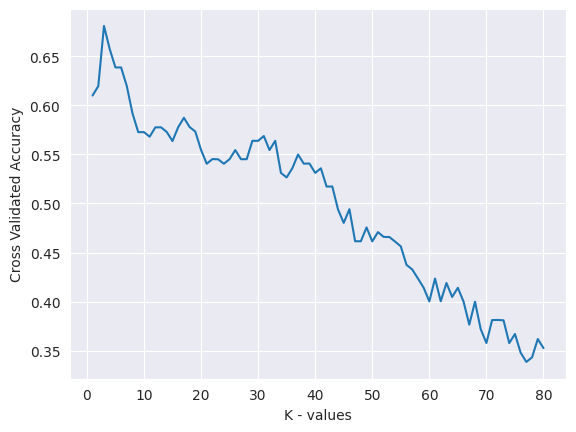

In [336]:
k_range = range(1,81)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn,X,y,cv=5)
  k_score.append(score.mean())


plt.plot(k_range,k_score)
plt.xlabel('K - values')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [337]:
pd.DataFrame(k_score).sort_values(0)

,0
76,0.338538
77,0.343189
75,0.347951
79,0.352602
73,0.357697
...,...
1,0.619491
4,0.638538
5,0.638538
3,0.657364


## Zoo

### Scenario

    Implement a KNN model to classify the animals in to categorie

### Loading and Reading dataset

In [193]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [338]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### EDA

#### Datatype Validation and Basic info checking


In [339]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [341]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [342]:
df.shape

(101, 18)

#### Repetition/Duplication checking for rows and columns

##### Row duplication checking

In [343]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


    No duplicate rows are present

##### Column duplication checking

In [345]:
df.T.duplicated()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

#### Null Values Checking

In [346]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

    There are no null values.

#### Correlation Analysis

In [347]:
df.corr()

<ipython-input-347-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<ipython-input-348-46dd64a0ac80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


<Axes: >

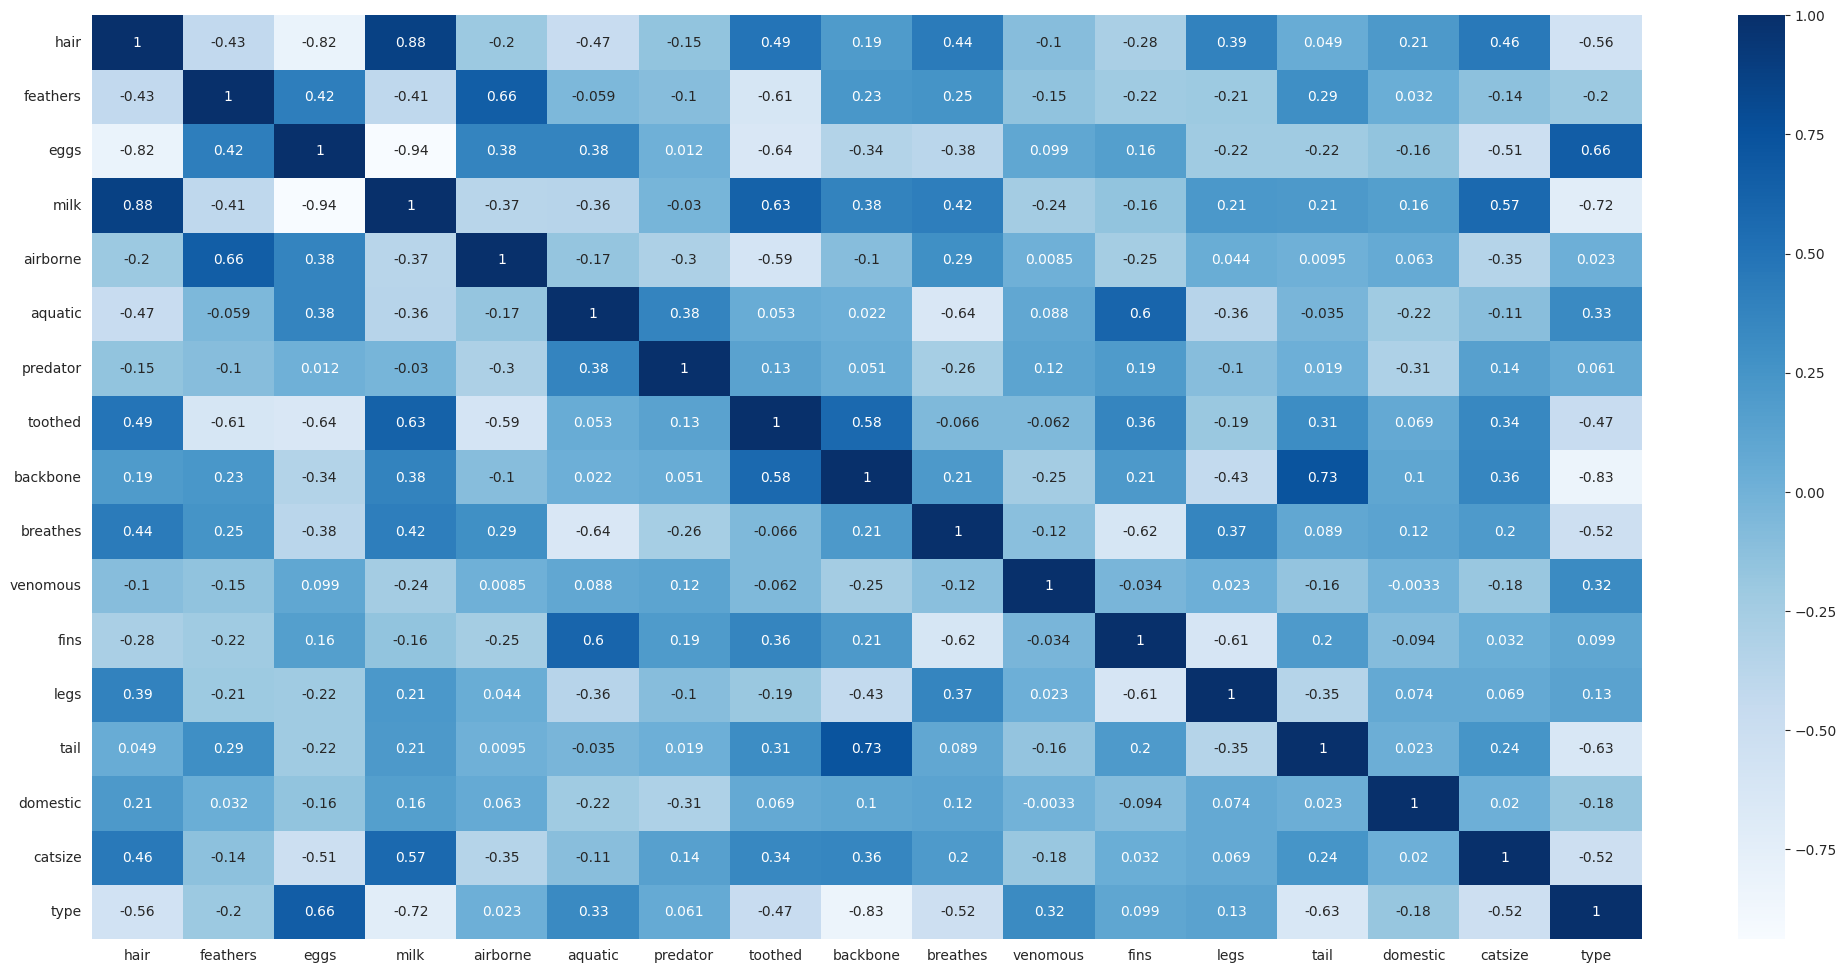

In [348]:
corr_mat = df.corr()

plt.figure(figsize=(25,12))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

<Figure size 2000x2000 with 0 Axes>

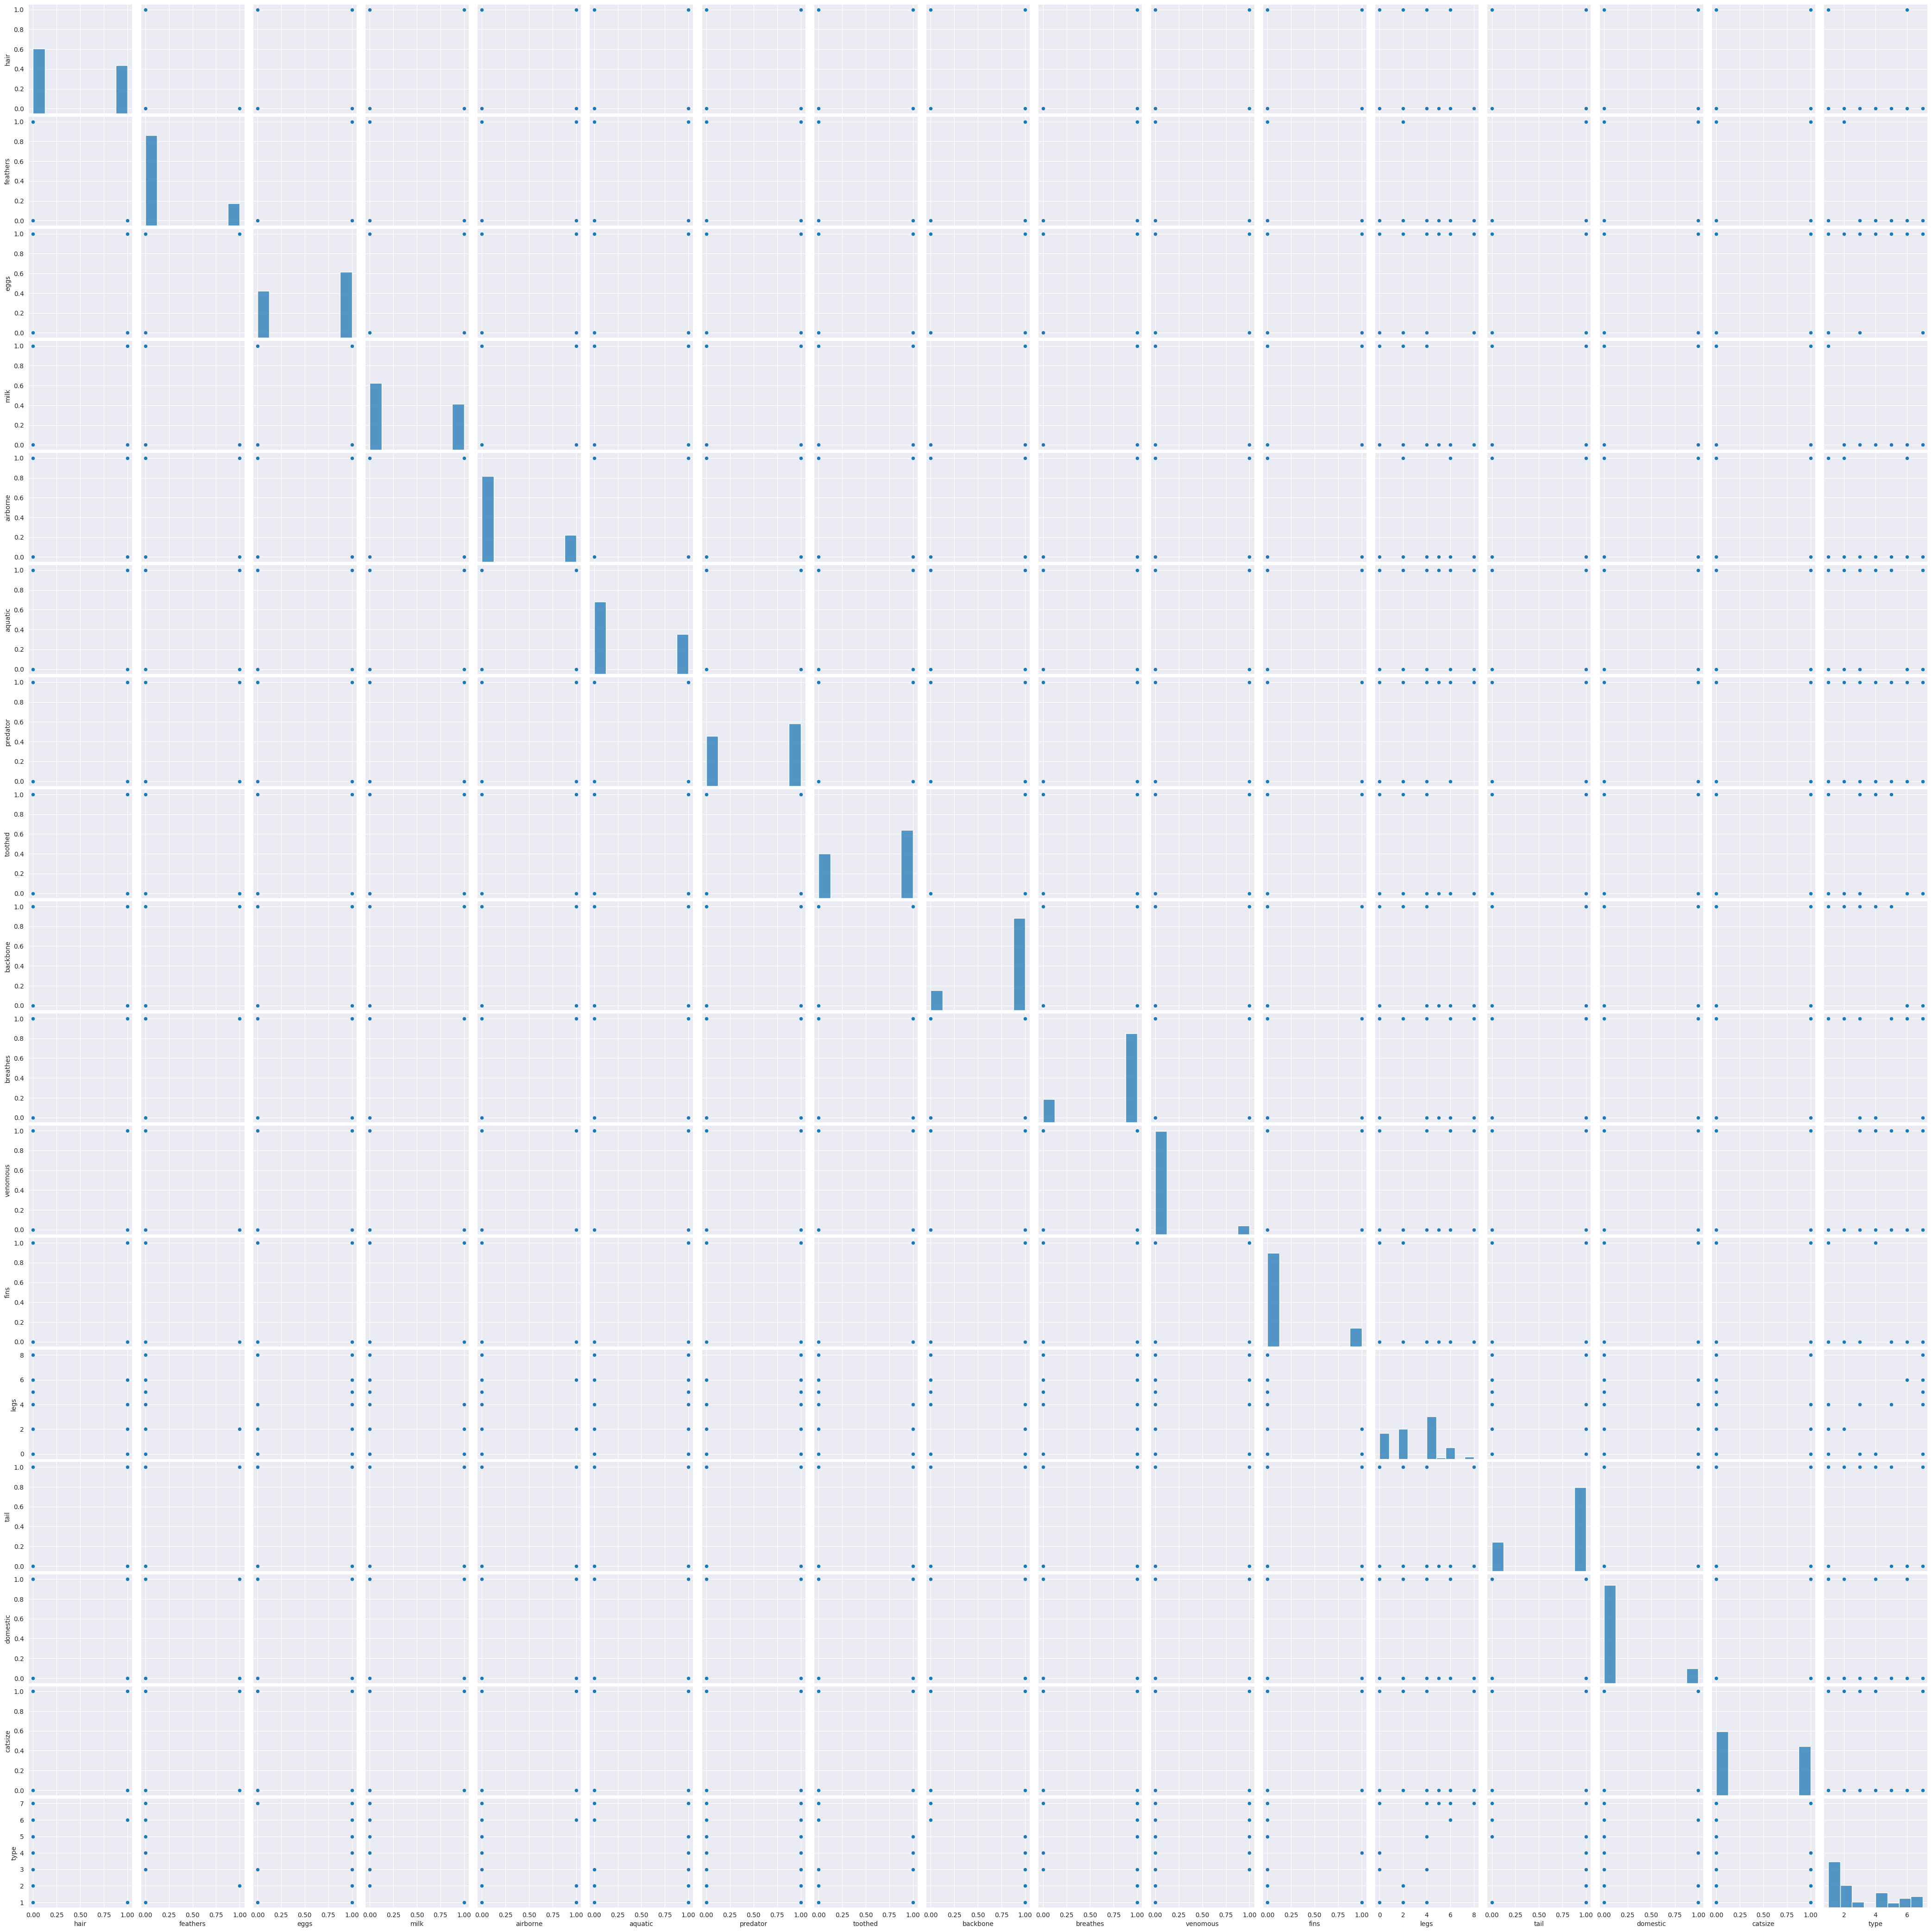

In [349]:
plt.figure(figsize=(20,20))
sns.set_style(style='darkgrid')
sns.pairplot(df)

#### Label Encoding/ Dummy variable creation for Categorical Variable

    Label encoding is not requirred as it is already encoded

In [350]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

#### Dependent/ Independent Variable Separation

In [351]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [352]:
X = df.iloc[:, 1:17]
y = df.iloc[:, 17]

In [353]:
print(X)
print(y)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

#### Scaling

    Since, the data is scaled already, so no need to scale.

### Model Building

#### KNN using KFold technique

In [354]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [355]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [356]:
kfold = KFold(n_splits=5)
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [357]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model,X,y,cv=kfold)
print(results)
print(results.mean())

[0.95238095 1.         1.         0.7        0.9       ]
0.9104761904761907


In [358]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [359]:
type_pred = model.predict(X)

In [360]:
type_pred_df = pd.DataFrame({'Actual_Type':y , 'Predicted_Type':type_pred})
type_pred_df

,Actual_Type,Predicted_Type
0,1,1
1,1,1
2,4,4
3,1,1
4,1,1
...,...,...
96,1,1
97,6,6
98,1,1
99,7,7


##### Confusion Matrix

In [361]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y,type_pred)
print(cfm)

[[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  3  1  1  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 10]]


##### Classification Report

In [362]:
from sklearn.metrics import classification_report

cr = classification_report(y,type_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      0.60      0.75         5
           4       0.93      1.00      0.96        13
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           0.98       101
   macro avg       0.96      0.94      0.94       101
weighted avg       0.98      0.98      0.98       101



    Here, I am getting accuracy of 98%, which is giving us true predictions.

#### Grid Search for Algorithm Tuning

In [363]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [364]:
n_neighbors = np.array(range(1,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [365]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn,param_grid=param_grid)
grid.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [366]:
grid_pred = grid.predict(X)
grid_pred

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [367]:
y_pred_df = pd.DataFrame({'Actual_Type':y,'Predicted_Type':grid_pred})
y_pred_df

,Actual_Type,Predicted_Type
0,1,1
1,1,1
2,4,4
3,1,1
4,1,1
...,...,...
96,1,1
97,6,6
98,1,1
99,7,7


In [368]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y,grid_pred)
print(cfm)

[[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 10]]


In [369]:
from sklearn.metrics import classification_report
print(classification_report(y,grid_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



In [370]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


##### Visualizing CV results

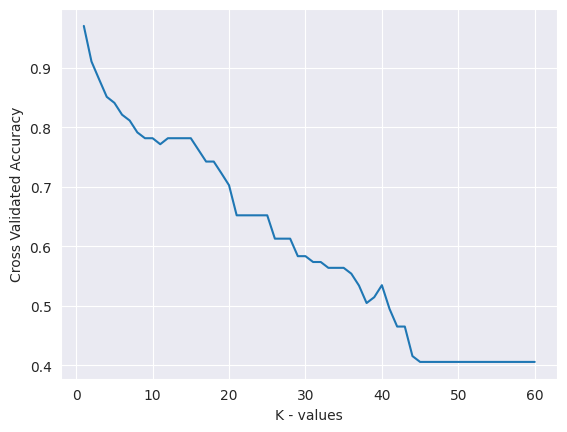

In [371]:
k_range = range(1,61)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn,X,y,cv=3)
  k_score.append(score.mean())


plt.plot(k_range,k_score)
plt.xlabel('K - values')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [373]:
pd.DataFrame(k_score).sort_values(0)

,0
59,0.405823
45,0.405823
46,0.405823
47,0.405823
48,0.405823
49,0.405823
50,0.405823
44,0.405823
52,0.405823
51,0.405823


    By Samit Dhawal